In [17]:
#The purpose of this code is to demonstrate when linear regression is a good fit
#and how it does not fit for binary problems.  Then a logistic regression is used to demonstrate
#a more appropriate fit.
#To accomplish this, a few sample datasets are created & the two models are demonstrated

# Author: Connor Sterrett

# ~~~~~~ Changelog ~~~~~~
# Version: v1
# Date: 2019-11-02
# Notes: Created datasets

# Version: v2
# Date: 2019-11-24
# Notes: Re-drew the sample and increased the number of players
# ~~~~~~~~~~~~~~~~~~~~~~~~

# Import statements
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline

# Allow multiple outputs from a single cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# Create a randomly distributed height - only to be used once
# Commented out in order to not overwrite generation
# Then save the height into a dataframe

# # Create an example dataset of height and weight.
height = np.random.normal(160,20,size=1000)
df_1 = pd.DataFrame(data=height)

df_1.to_pickle("./height_2.pkl")

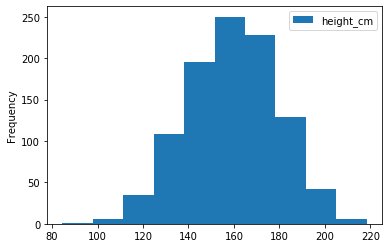

In [4]:
df_1 = pd.read_pickle("./height_2.pkl")
df_1.columns = ['height_cm']
# Visualize the distribution
df_1.plot.hist()

Text(0.5, 1.0, 'Height & Weight')

Text(0.5, 0, 'height_cm')

Text(0, 0.5, 'weight_kg')

,height_cm,weight_kg
count,1000.000000,1000.000000
mean,159.592295,65.061513
std,19.937131,10.938610
min,84.553856,27.708108
25%,146.164633,57.898319
50%,159.987381,65.377547
75%,173.518617,72.191811
max,218.470300,96.267216


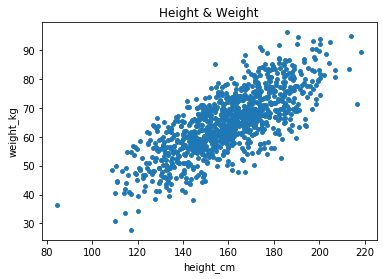

In [5]:
# Add weight based on height
# Comment out in order to not overwrite
height = df_1['height_cm']
avg_height = np.mean(height)

# Take the % difference from the mean height and multiply it by the
# average weight (65kg) as a starting point for weight
st_weight = 65*(1+((height - avg_height)/avg_height))

# Distribute weight normally around the starting point
tst_weight = np.random.normal(st_weight,7)

# Write into dataframe
df_1['weight_kg'] = tst_weight

# Plot relationship between height and weight
plt.scatter(df_1['height_cm'],df_1['weight_kg'],s=15)
plt.title("Height & Weight")
plt.xlabel("height_cm")
plt.ylabel("weight_kg")
# df_1.plot.scatter(x='height_cm',y='weight_kg',title='Height & Weight')
df_1.describe()

# Write to file
df_1.to_pickle("./height_wt_2.pkl")

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0.5, 1.0, 'Height & Weight - Linear Regression')

Text(0.5, 0, 'height_cm')

Text(0, 0.5, 'weight_kg')

Mean Absolute Error: 5.738291274376733
Mean Squared Error: 51.8634721333425
Root Mean Squared Error: 7.201629824792614
R^2: 0.7524079872095801


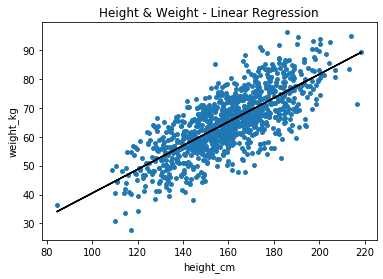

In [6]:
# Fit a linear regression to the data
df_1 = pd.read_pickle("./height_wt_2.pkl")
x = df_1['height_cm'].values.reshape(-1,1)
y = df_1['weight_kg'].values.reshape(-1,1)
regressor = LinearRegression()
regressor.fit(x,y)

df_1['pred_wt_lr'] = regressor.predict(x)

plt.scatter(df_1['height_cm'],df_1['weight_kg'], color='tab:blue', s=15)
plt.plot(df_1['height_cm'],df_1['pred_wt_lr'],color='k')
plt.title("Height & Weight - Linear Regression")
plt.xlabel("height_cm")
plt.ylabel("weight_kg")


print('Mean Absolute Error:', metrics.mean_absolute_error(df_1['weight_kg'], df_1['pred_wt_lr']))  
print('Mean Squared Error:', metrics.mean_squared_error(df_1['weight_kg'], df_1['pred_wt_lr']))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(df_1['weight_kg'], df_1['pred_wt_lr'])))
print('R^2:', np.sqrt(metrics.r2_score(df_1['weight_kg'], df_1['pred_wt_lr'])))

0    984
1     16
Name: team_ind, dtype: int64

Text(0.5, 1.0, 'Height & Team Membership Indicator')

Text(0.5, 0, 'height_cm')

Text(0, 0.5, 'team_ind')

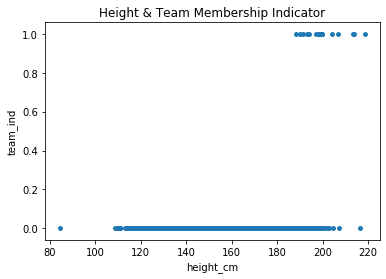

In [64]:
# Generate a third variable - membership of basketball team
# Binary variable with increasing probability based on height

avg_height = np.mean(df_1['height_cm'])

# Take the % difference from the mean height and multiply it by the
# average weight (65kg) as a starting point for weight
st_prob = 0.5*(1+((df_1['height_cm'] - avg_height)/avg_height))

# Distribute prob normally around the starting point
tst_prob = np.random.normal(st_prob,.05)
    
# Create a function to calculate the indicator based on the top probability
def fn_team_ind(row):
    st_prob = 0.7*(1+((row['height_cm'] - avg_height)/avg_height))
    tst_prob = np.random.normal(st_prob,.05)
    if tst_prob > .92:
        return 1
    else:
        return 0

# Comment in order to not overwrite
df_1['team_ind']= df_1.apply(fn_team_ind,axis=1)
df_1['team_ind'].value_counts()

plt.scatter(df_1['height_cm'],df_1['team_ind'],s=15)
plt.title("Height & Team Membership Indicator")
plt.xlabel("height_cm")
plt.ylabel("team_ind")

df_1.to_pickle("./height_wt_team_2.pkl")

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0.5, 1.0, 'Height & Team Membership - Linear Regression')

Text(0.5, 0, 'height_cm')

Text(0, 0.5, 'team_ind')

Mean Absolute Error: 0.042977819449970825
Mean Squared Error: 0.014671256261010453
Root Mean Squared Error: 0.12112496134575422
R^2: 0.26103001822292826


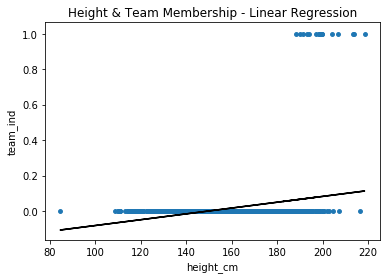

In [65]:
# Apply a linear regression to the height and membership
df_1 = pd.read_pickle("./height_wt_team_2.pkl")
x_2 = df_1['height_cm'].values.reshape(-1,1)
y_2 = df_1['team_ind'].values.reshape(-1,1)
regressor_2 = LinearRegression()
regressor_2.fit(x_2,y_2)

df_1['pred_tm_lr'] = regressor_2.predict(x_2)

plt.scatter(df_1['height_cm'],df_1['team_ind'], color='tab:blue', s=15)
plt.plot(df_1['height_cm'],df_1['pred_tm_lr'],color='k')
plt.title("Height & Team Membership - Linear Regression")
plt.xlabel("height_cm")
plt.ylabel("team_ind")


print('Mean Absolute Error:', metrics.mean_absolute_error(df_1['team_ind'], df_1['pred_tm_lr']))  
print('Mean Squared Error:', metrics.mean_squared_error(df_1['team_ind'], df_1['pred_tm_lr']))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(df_1['team_ind'], df_1['pred_tm_lr'])))
print('R^2:', np.sqrt(metrics.r2_score(df_1['team_ind'], df_1['pred_tm_lr'])))

Text(0.5, 1.0, 'Team Membership Error & Height')

Text(0.5, 0, 'height_cm')

Text(0, 0.5, 'error_team_membership')

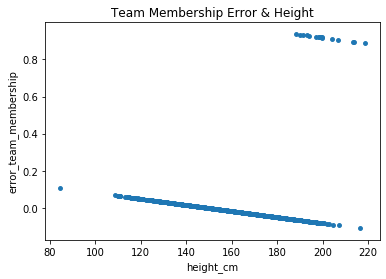

In [66]:
# Plot the error of the linear regression model
df_1['err_pred_tm_lr'] = df_1['team_ind']-df_1['pred_tm_lr']
plt.scatter(df_1['height_cm'],df_1['err_pred_tm_lr'], color='tab:blue', s=15)
plt.title("Team Membership Error & Height")
plt.xlabel("height_cm")
plt.ylabel("error_team_membership")

Text(0.5, 1.0, 'Weight Error & Height')

Text(0.5, 0, 'height_cm')

Text(0, 0.5, 'error_weight')

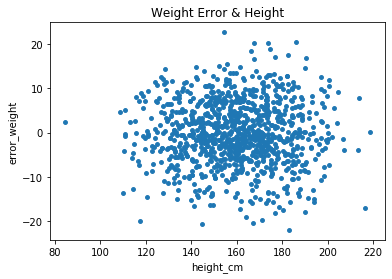

In [67]:
# Compare to the error predicted for weight
df_1['err_pred_wt_lr'] = df_1['weight_kg']-df_1['pred_wt_lr']
plt.scatter(df_1['height_cm'],df_1['err_pred_wt_lr'], color='tab:blue', s=15)
plt.title("Weight Error & Height")
plt.xlabel("height_cm")
plt.ylabel("error_weight")

(1000, 1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

array([0, 1], dtype=int64)

array([[0.19597055]])

array([-40.1917315])

Text(0.5, 1.0, 'Height & Team Membership - Logistic Regression')

Text(0.5, 0, 'height_cm')

Text(0, 0.5, 'team_ind')

Mean Absolute Error: 0.014
Mean Squared Error: 0.014
Root Mean Squared Error: 0.11832159566199232
R^2: 0.3328248153662485
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       984
           1       0.67      0.25      0.36        16

    accuracy                           0.99      1000
   macro avg       0.83      0.62      0.68      1000
weighted avg       0.98      0.99      0.98      1000



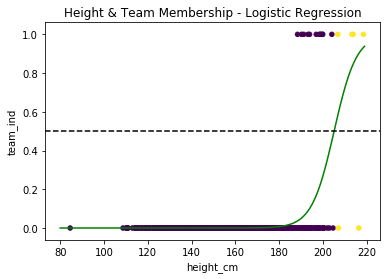

In [80]:
# Fit a logistic regression to the team membership data
df_1 = pd.read_pickle("./height_wt_team_2.pkl")
# x_2 = np.ravel(df_1['height_cm'].values)
# y_2 = np.ravel(df_1['team_ind'].values)

# x_2 = np.ravel(df_1['height_cm'].values)

x_2 = df_1['height_cm'].values.reshape(-1,1)
x_2.shape

# x_2
y_2 = np.ravel(df_1['team_ind'].values)
# y_2
# df_1['height_cm'].values.shape()
# df_1['team_ind'].values.shape()
# x_2.shape()
# y_2.shape()
# y_2 = df_1['team_ind'].values.reshape(-1,1)
regressor_logr = LogisticRegression(solver="lbfgs")
regressor_logr.fit(x_2,y_2)
regressor_logr.classes_
regressor_logr.coef_
regressor_logr.intercept_


df_1['pred_tm_logr'] = regressor_logr.predict(x_2)
df_1['pred_prob_logr'] = regressor_logr.predict_proba(x_2)[:,1]

#Generate a plot of the expected probability at each height to illustrate sigmoid curve
exmpl_ht = np.arange(80,220,1)
probabilities = []
for h in exmpl_ht:
    p_nt, p_t = regressor_logr.predict_proba([[h]])[0]
    probabilities.append(p_t)

plt.scatter(df_1['height_cm'],df_1['team_ind'], c=df_1['pred_tm_logr'],s=20)
plt.plot(exmpl_ht,probabilities,color='green')
plt.axhline(y=0.5,color='k',linestyle='--')
plt.title("Height & Team Membership - Logistic Regression")
plt.xlabel("height_cm")
plt.ylabel("team_ind")


print('Mean Absolute Error:', metrics.mean_absolute_error(df_1['team_ind'], df_1['pred_tm_logr']))  
print('Mean Squared Error:', metrics.mean_squared_error(df_1['team_ind'], df_1['pred_tm_logr']))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(df_1['team_ind'], df_1['pred_tm_logr'])))
print('R^2:', np.sqrt(metrics.r2_score(df_1['team_ind'], df_1['pred_tm_logr'])))

print(metrics.classification_report(df_1['team_ind'], df_1['pred_tm_logr']))

# df_1.loc[(df_1['pred_prob_logr']>=.4) & (df_1['pred_prob_logr']<=.6)]
# df_1.loc[df_1['height_cm']>=200]
# regressor_logr.predict_proba(200.486959)[:,1]

# Plot the probability 

Text(0.5, 1.0, 'Team Membership Error & Height')

Text(0.5, 0, 'height_cm')

Text(0, 0.5, 'error_team_membership')

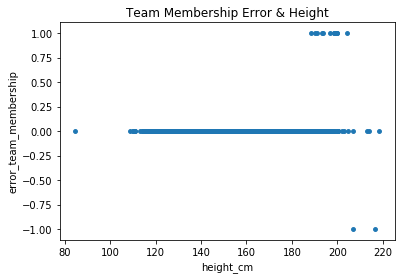

In [81]:
#Plot the error for the logistic regression
df_1['err_pred_tm_logr'] = df_1['team_ind']-df_1['pred_tm_logr']
plt.scatter(df_1['height_cm'],df_1['err_pred_tm_logr'], color='tab:blue', s=15)
plt.title("Team Membership Error & Height")
plt.xlabel("height_cm")
plt.ylabel("error_team_membership")